# Title: Selecting Best Model for Given Data Set using Multiple Regression Techniques
# Name: Umar Ahsan
# SID: 200 353 718
# ENEL 890AK Course Project

# Problem Statement: The main goal of this project is to deploy currently 
# available regression techniques on selected data set ( Housing Data) to 
# generate the most accurate model for that data in order to predict price of any house.

# Steps:
--- Implement Lasso regression using graphlab linear_regression function with different L1 penalty.
--- Choose best L1 penalty using validation set.
--- Implement Ridge regression using graphlab linear_regression function with different L2 penalty.
--- Choose best L2 penalty using validation set.
--- Implement ElasticNet regression using graphlab linear_regression function with different L1 and L2 penalty.
--- Choose best L1 and L2 penalty using validation set.
--- Compare performance of all three models on test set through RSS calculation
--- Add features in the data set that are generated from existing features and add them to the data set.
--- Repeat all three regression techniques on the new data set and compare the performance of model using RSS.
--- Compare the results of new data set models with original data set model using RSS values.
--- The model with minimum RSS will be the best fited model among these three regression techniques for Housing Data set.

In [1]:
# Import Graphlab library into Notebook
import graphlab
# Import numpy for vector manipulation 
import numpy as np
# Import pyplot from matplotlib in order to plot values on graph
from matplotlib import pyplot as plt
%matplotlib inline


A newer version of GraphLab Create (v2.1) is available! Your current version is v1.10.1.

You can use pip to upgrade the graphlab-create package. For more information see https://dato.com/products/create/upgrade.


In [2]:
# Loading data set and storing it into sales_data
sales_data = graphlab.SFrame('kc_house_data.gl/kc_house_data.gl')

This non-commercial license of GraphLab Create for academic use is assigned to ahsan20u@uregina.ca and will expire on June 23, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v1.10.1 started. Logging: C:\Users\Umar\AppData\Local\Temp\graphlab_server_1470618874.log.0


In [3]:
# The next step is to divide the data set into training and testing subset.
# After reading few articles, it is concluded that generally the best split between training and test subset is 80/20 i.e. 
# 90 % data should be training while 10 % should be testing.
(training_and_validation_data, testing_data) = sales_data.random_split(.9,seed=1) # initial training/test split as discussed above.
# Here, seed=1 is used that will act as a parameter to generate random split for the data set.
# Since we will be using cross validation therefore we donot need to split 'training_and_validation_data' into 'training' and
# 'validation' data seprately.

In [4]:
# Defining a function to calculate Residual Sum of Squares (RSS). It basically takes difference between two inputed parameter and
# returns output as their difference.
def RSS_data(prediction,actual):
    difference = actual - prediction # It takes difference between actual value and predicted value. Since, actual as well
                                    # prediction are in SFrame therefore the difference is calculated corresponding to each entry
    square_diff = difference * difference # We are squaring the difference in order to make them all positive
    total_diff  = square_diff.sum() # sum up all the values using .sum() function
    return(total_diff)
    

In [5]:
# Exploring data set in order to find relevant features to be used for modeling
sales_data

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [6]:
# Selecting all features that are present in the data set in order to use it in linear_regression function
features_for_modeling = ['bedrooms','bathrooms',
                        'sqft_living','sqft_lot',
                        'floors','waterfront', 'view', 
                        'condition', 'grade','sqft_above',
                        'sqft_basement','yr_built', 'yr_renovated',
                        'sqft_living15', 'sqft_lot15']

# Implementing Ridge Regression Technique

In [7]:
# This function will take following values as input:
# K: Number of segments into which data is divided
# L2_penalty
# Data: The dataset
# features_for_modeling: Include all the features that will be used for modeling
def k_fold_cross_validation_l2(k, L2_penalty, data,features_for_modeling):

    n= len(data) # Variable to calculate the length of data set
    Total_Sum= 0 # It will store the total error and therefore initial error is zero
    for i in xrange(k):
        start = (n*i)/k # Start point of selected Kth frame (As described above)
        end = (n*(i+1))/k-1 # Ending point of selected Kth frame (As described above)
        validation_set= data[start:end+1] # That data will be used to test the predicted model
        training_set= data[0:start].append(data[end+1:n]) # That data set will be used to train and predict the model
        model_trained = graphlab.linear_regression.create(training_set, features= features_for_modeling,
                                              target='price', l2_penalty=L2_penalty,l1_penalty=0,feature_rescaling= True,
                                         validation_set=None,verbose=False) # Training of model
        model_prediction = model_trained.predict(validation_set) # validating the model
        l2_RSS = RSS_data(model_prediction, validation_set['price']) # Comparing predicted price from model with actual one
        Total_Sum = Total_Sum + l2_RSS # Adding new error with existing one
        Avg_Sum = Total_Sum/k # Averaging out the sum
    return Avg_Sum

The best L2 penalty is:  0.0923670857187
The lowest RSS corresponding to best L2 penalty is:  9.0830629956e+13


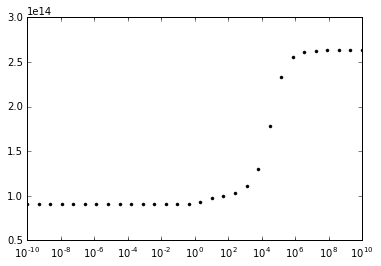

In [8]:
# Using the above function to predict best model using multiple values of L2 penalty
best_l2_penalty = 0 # Initializing
lowest_RSS_l2 = 10e20 # Initializing 
for L2_penalty in np.logspace(-10,10, num=30): # Range of values for which L2 penalty value changes
    error_l2 = k_fold_cross_validation_l2(10,L2_penalty,training_and_validation_data,features_for_modeling) # Using the above 
                                                                                                #function to get the error
    if lowest_RSS_l2 > error_l2: # Checking for the lowest error
        best_l2_penalty = L2_penalty # If the condition is true then the new best_l2_penalty is from that model
        lowest_RSS_l2 = error_l2 # Also setting lowest RSS for that corresponding l2 penalty
    plt.xscale('log') # Ploting all values of l2 penalty vs errors
    plt.plot(L2_penalty,error_l2,'k.')
# Printing the error along with the L2_penalty
print "The best L2 penalty is: ", best_l2_penalty
print "The lowest RSS corresponding to best L2 penalty is: ", lowest_RSS_l2

# Implementing Lasso Regression Technique

In [9]:
# This function will take following values as input:
# K: Number of segments into which data is divided
# L1_penalty
# Data: The dataset
# features_for_modeling: Include all the features that will be used for modeling
def k_fold_cross_validation_l1(k, L1_penalty, data,features_for_modeling):

    n_l1= len(data) # Variable to calculate the length of data set
    Total_Sum_l1= 0 # It will store the total error and therefore initial error is zero
    for i in xrange(k):
        start_l1 = (n_l1*i)/k # Start point of selected Kth frame (As described above)
        end_l1 = (n_l1*(i+1))/k-1 # Ending point of selected Kth frame (As described above)
        validation_set_l1= data[start_l1:end_l1+1] # That data will be used to test the predicted model
        training_set_l1= data[0:start_l1].append(data[end_l1+1:n_l1]) # That data set will be used to train and predict the model
        model_trained_l1 = graphlab.linear_regression.create(training_set_l1, features= features_for_modeling,
                                              target='price', l2_penalty=0,l1_penalty=L1_penalty,
                                         validation_set=None,verbose=False) # Training of model
        model_prediction_l1 = model_trained_l1.predict(validation_set_l1) # validating the model
        l1_RSS = RSS_data(model_prediction_l1, validation_set_l1['price'])
        Total_Sum_l1 = Total_Sum_l1 + l1_RSS
        Avg_Sum_l1 = Total_Sum_l1/k # Averaging out the sum
    return Avg_Sum_l1

The best L1 penalty is:  1e-10
The lowest RSS corresponding to best L1 penalty is:  1.28749907777e+14


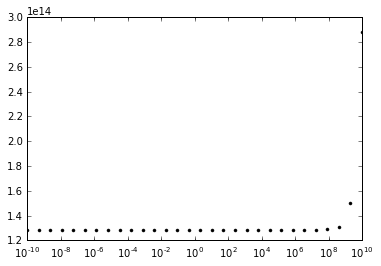

In [10]:
# Using the above function to predict best model using multiple values of L1 penalty
best_l1_penalty = 0 # Initializing
lowest_RSS_l1 = 10e20 # Initializing
for L1_penalty in np.logspace(-10,10, num=30): # Range of values for which L1 penalty value changes
    error_l1 = k_fold_cross_validation_l1(10,L1_penalty,training_and_validation_data,features_for_modeling) # Using the above 
                                                                                                #function to get the error
    if lowest_RSS_l1 > error_l1:# Checking for the lowest error
        best_l1_penalty = L1_penalty # If the condition is true then the new best_l1_penalty is from that model
        lowest_RSS_l1 = error_l1 # Also setting lowest RSS for that corresponding l1 penalty
    plt.xscale('log') # Ploting all values of l2 penalty vs errors
    plt.plot(L1_penalty,error_l1,'k.')
# Printing the error along with the L2_penalty
print "The best L1 penalty is: ", best_l1_penalty
print "The lowest RSS corresponding to best L1 penalty is: ", lowest_RSS_l1

# Implementing Elastic Net Regression Technique

In [11]:
# Data: The dataset
def k_fold_cross_validation_l12(k, L12_penalty,L11_penalty,data,features_for_modeling):

    n= len(data) # Variable to calculate the length of data set
    Total_Sum_l12= 0 # It will store the total error and therefore initial error is zero
    for i in xrange(k):
        start_l12 = (n*i)/k # Start point of selected Kth frame (As described above)
        end_l12 = (n*(i+1))/k-1 # Ending point of selected Kth frame (As described above)
        validation_set_l12= data[start_l12:end_l12+1] # That data will be used to test the predicted model
        training_set_l12= data[0:start_l12].append(data[end_l12+1:n]) # That data set will be used to train and predict the model
        model_trained_l12 = graphlab.linear_regression.create(training_set_l12, features= features_for_modeling,
                                              target='price', l2_penalty=L12_penalty,l1_penalty=L11_penalty,
                                         validation_set=None,verbose=False) # Training of model
        model_prediction_l12 = model_trained_l12.predict(validation_set_l12) # validating the model
        l12_RSS = RSS_data(model_prediction_l12, validation_set_l12['price'])
        Total_Sum_l12 = Total_Sum_l12 + l12_RSS
        Avg_Sum_l12 = Total_Sum_l12/k # Averaging out the sum
    return Avg_Sum_l12

The best L1 penalty is:  1e-10
The best L2 penalty is:  1e-10
The lowest RSS corresponding to best L1/L2 penalty is:  1.28749907777e+14


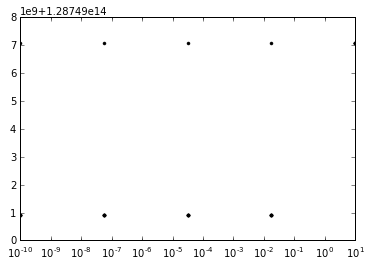

In [12]:
# Using the above function to predict best model using multiple values of L1 penalty
best_l12_penalty = 0 # Initializing
lowest_RSS_l12 = 10e20 # Initializing
for L11_penalty in np.logspace(-10,1, num=5): # Range of values for which L1 penalty value changes
    for L12_penalty in np.logspace(-10,1, num=5): # Range of values for which L2 penalty value changes
        error_l12 = k_fold_cross_validation_l12(10,L12_penalty,L11_penalty,training_and_validation_data,features_for_modeling) # Using
                                                                                    # the above function to get the error
        if lowest_RSS_l12 > error_l12: # Checking for the lowest error
            best_l12_penalty = L12_penalty# If the condition is true then the new best_l2_penalty is from that model
            best_l11_penalty = L11_penalty# If the condition is true then the new best_l1_penalty is from that model
            lowest_RSS_l12 = error_l12# Also setting lowest RSS for that corresponding l1 and l2 penalty
        # Since there are three parameters for plotting i.e. L1 Penalty, L2 Penalty, and Error therefore in order
        # to draw them we use two different plots as shown below
        plt.xscale('log')
        plt.plot(L12_penalty,error_l12,'k.') # For L2 Penalty
    plt.xscale('log')
    plt.plot(L11_penalty,error_l12,'k.') # For L1 Penalty
# Printing the error along with the L2_penalty
print "The best L1 penalty is: ", best_l11_penalty
print "The best L2 penalty is: ", best_l12_penalty
print "The lowest RSS corresponding to best L1/L2 penalty is: ", lowest_RSS_l12

# Modeling with no regularization i.e. without any penalty

In [13]:
# Data: The dataset
def k_fold_cross_validation_no_penalty(k, no_penalty, data,features_for_modeling):

    n= len(data) # Variable to calculate the length of data set
    Total_Sum_no= 0 # It will store the total error and therefore initial error is zero
    for i in xrange(k):
        start_no = (n*i)/k # Start point of selected Kth frame (As described above)
        end_no = (n*(i+1))/k-1 # Ending point of selected Kth frame (As described above)
        validation_set_no= data[start_no:end_no+1] # That data will be used to test the predicted model
        training_set_no= data[0:start_no].append(data[end_no+1:n]) # That data set will be used to train and predict the model
        model_trained_no = graphlab.linear_regression.create(training_set_no, features= features_for_modeling,
                                              target='price', l2_penalty=0,l1_penalty=0,
                                         validation_set=None,verbose=False) # Training of model
        model_prediction_no = model_trained_no.predict(validation_set_no) # validating the model
        RSS_no = RSS_data(model_prediction_no, validation_set_no['price'])
        Total_Sum_no = Total_Sum_no + RSS_no
        Avg_Sum_no = Total_Sum_no/k # Averaging out the sum
    return Avg_Sum_no

In [14]:
best_no_penalty = 0 # Setting best_no_penalty variable to be 0
lowest_RSS_no = 10e20 # Initializing
error_no = k_fold_cross_validation_no_penalty(10,0,training_and_validation_data,features_for_modeling) # Using the above function 
                                                                                                #to get the error
lowest_RSS_no = error_no # The error of the model 
print "The value of no penalty is: ", best_no_penalty
print "RSS value corresponding to no penalty is: ", lowest_RSS_no

The value of no penalty is:  0
RSS value corresponding to no penalty is:  9.08373912816e+13


In [15]:
print "Best L2 Penalty: ", best_l2_penalty
print "Error corresponding to best L2 penalty: ", lowest_RSS_l2
print "Best L1 Penalty: ", best_l1_penalty
print "Error corresponding to best L1 penalty: ", lowest_RSS_l1
print "Best L1 Penalty and L2 penalty respectively: ", best_l11_penalty, best_l12_penalty
print "Error corresponding to best L1 and L2 penalty: ", lowest_RSS_l12
print "Value of No penalty: ", best_no_penalty
print "Error corresponding to no penalty is: ", lowest_RSS_no

Best L2 Penalty:  0.0923670857187
Error corresponding to best L2 penalty:  9.0830629956e+13
Best L1 Penalty:  1e-10
Error corresponding to best L1 penalty:  1.28749907777e+14
Best L1 Penalty and L2 penalty respectively:  1e-10 1e-10
Error corresponding to best L1 and L2 penalty:  1.28749907777e+14
Value of No penalty:  0
Error corresponding to no penalty is:  9.08373912816e+13


# Testing the Dataset
### Now the next step is to test the dataset using testing data corresponding to best ridge, lasso and elasticnet 
### model and check which model can most accurately predict the dataset. 

In [16]:
# Ridge Regression
# Here we set value of L2 penalty corresponding to best value that we calculated above
model_trained_test_l2 = graphlab.linear_regression.create(training_and_validation_data, features= features_for_modeling ,
                                             target='price', l2_penalty= best_l2_penalty,l1_penalty=0,feature_rescaling= True,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l2 = model_trained_test_l2.predict(testing_data) # validating the model
RSS_trained_l2 = RSS_data(model_trained_l2, testing_data['price']) # Comparing the values
print "RSS value for testing data corresponding to best L2 Penalty: ", RSS_trained_l2

# Lasso Regression
# Here we set value of L1 penalty corresponding to best value that we calculated above
model_trained_test_l1 = graphlab.linear_regression.create(training_and_validation_data, features= features_for_modeling ,
                                             target='price', l2_penalty=0,l1_penalty=best_l2_penalty,max_iterations=100,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l1 = model_trained_test_l1.predict(testing_data) # validating the model
RSS_trained_l1 = RSS_data(model_trained_l1, testing_data['price'])  # Comparing the values
print "RSS value for testing data corresponding to best L1 Penalty: ", RSS_trained_l1

# ElasticNet Regression
# Here we set value of L1 penalty corresponding to best value that we calculated above
model_trained_test_l12 = graphlab.linear_regression.create(training_and_validation_data, features= features_for_modeling ,
                                             target='price', l2_penalty=best_l12_penalty,l1_penalty=best_l11_penalty,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l12 = model_trained_test_l12.predict(testing_data) # validating the model
RSS_trained_l12 = RSS_data(model_trained_l12, testing_data['price']) # Comparing the values
print "RSS value for testing data corresponding to best L1,L2 Penalty: ", RSS_trained_l12

# No Regularization
# Here we set value of L1 and L2 penalty to be zero 
model_trained_test_no = graphlab.linear_regression.create(training_and_validation_data, features= features_for_modeling ,
                                             target='price', l2_penalty=0,l1_penalty=0,max_iterations=100,feature_rescaling= True,
                                        validation_set=None,verbose=False) # Training of model
model_trained_no = model_trained_test_no.predict(testing_data) # validating the model
RSS_trained_no = RSS_data(model_trained_no, testing_data['price'])  # Comparing the values
print "RSS value for testing data corresponding to no Penalty: ", RSS_trained_l12

RSS value for testing data corresponding to best L2 Penalty:  1.03138268068e+14
RSS value for testing data corresponding to best L1 Penalty:  1.12975857254e+14
RSS value for testing data corresponding to best L1,L2 Penalty:  1.48515271857e+14
RSS value for testing data corresponding to no Penalty:  1.48515271857e+14


# Adding Features in the data

Since there are few features in the given data therefore we will add few more features from the existing features in order
to increase value of those features that are important in decision making while buyig/selling the house.
We will add following features from existing features:
sqft_living_sqrt from Sqft_living by taking its square root
sqft_lot_sqrt from sqft_lot by taking its square root
sq_floors from floors by squaring it
sq_bedrooms from bedrooms
sq_sqft_basement from sqft_basement by squaring it. 
Similarly muliple other features are added in it in order to best fit the model

In [17]:
from math import log, sqrt # Importing log and sqrt from the math library
# Here were are adding features to data set by either squaring or taking square root of existing features
sales_data['sqft_living_sqrt'] = sales_data['sqft_living'].apply(sqrt)
sales_data['sqft_lot_sqrt'] = sales_data['sqft_lot'].apply(sqrt)
sales_data['sqft_living15_sqrt'] = sales_data['sqft_living15'].apply(sqrt)
sales_data['sqft_lot15_sqrt'] = sales_data['sqft_lot15'].apply(sqrt)
sales_data['sqft_above_sqrt'] = sales_data['sqft_above'].apply(sqrt)
sales_data['sq_condition'] = sales_data['condition']* sales_data['condition']
# Since, 'floors' is defined as type string, 
# so we'll convert that column to float, before creating a new feature from it.
sales_data['floors'] = sales_data['floors'].astype(float) 
sales_data['sq_floors'] = sales_data['floors']*sales_data['floors']
sales_data['sq_yr_renovated'] = sales_data['yr_renovated']*sales_data['yr_renovated']
sales_data['sq_yr_built'] = sales_data['yr_built']* sales_data['yr_built']
sales_data['sq_bedrooms'] = sales_data['bedrooms']*sales_data['bedrooms']
sales_data['cb_bedrooms'] = sales_data['bedrooms']*sales_data['bedrooms']*sales_data['bedrooms'].apply(sqrt)
sales_data['sq_bathrooms'] = sales_data['bathrooms']*sales_data['bathrooms']
sales_data['cb_bathrooms'] = sales_data['bathrooms']*sales_data['bathrooms']*sales_data['bathrooms']
sales_data['sqrt_sqft_basement'] = sales_data['sqft_basement'].apply(sqrt)

In [18]:
new_all_features= ['bedrooms','bathrooms',
                        'sqft_living','sqft_lot',
                        'floors','waterfront', 'view', 
                        'condition', 'grade','sqft_above', 'sq_condition','sqft_above_sqrt',
                        'sqft_basement','yr_built', 'yr_renovated',
                        'sqft_living15', 'sqft_lot15', 'sq_floors', 'sq_yr_renovated',
                         'sqft_living15_sqrt','sqft_living_sqrt','sqft_lot_sqrt',
                        'sq_bathrooms','sq_bedrooms','sqrt_sqft_basement', 'cb_bedrooms']

# Generating New Training/Validation and Testing data with added features

In [19]:
# The next step is to divide the data set into training and testing subset.
# After reading few articles, it is concluded that generally the best split between training and test subset is 80/20 i.e. 
# 90 % data should be training while 10 % should be testing.
(training_and_validation_data_fe, testing_data_fe) = sales_data.random_split(.9,seed=1) # initial training/test split
# as discussed above.
# Here, seed=1 is used that will act as a parameter to generate random split for the data set.
# Since we will be using cross validation therefore we donot need to split 'training_and_validation_data' into 'training' and
# 'validation' data seprately.

# Ridge Regression with added Features

The best L2 penalty with added features is:  0.0188739182214
The lowest RSS with added features corresponding to best L2 penalty is:  8.09215852421e+13


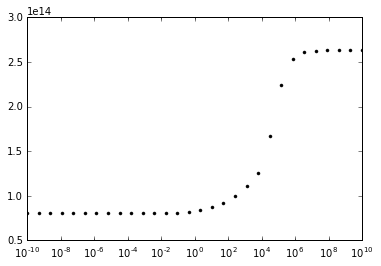

In [20]:
# Using the function to predict best model using multiple values of L2 penalty
best_l2_penalty = 0 # Initializing
lowest_RSS_l2 = 10e20 # Initializing 
for L2_penalty in np.logspace(-10,10, num=30): # Range of values for which L2 penalty value changes
    error_l2 = k_fold_cross_validation_l2(10,L2_penalty,training_and_validation_data_fe,new_all_features) # Using the above 
                                                                                                #function to get the error
    if lowest_RSS_l2 > error_l2: # Checking for the lowest error
        best_l2_penalty = L2_penalty # If the condition is true then the new best_l2_penalty is from that model
        lowest_RSS_l2 = error_l2 # Also setting lowest RSS for that corresponding l2 penalty
    plt.xscale('log') # Ploting all values of l2 penalty vs errors
    plt.plot(L2_penalty,error_l2,'k.')
# Printing the error along with the L2_penalty
print "The best L2 penalty with added features is: ", best_l2_penalty
print "The lowest RSS with added features corresponding to best L2 penalty is: ", lowest_RSS_l2

# Lasso Regression with Added Features

The best L1 penalty with added features is:  1e-10
The lowest RSS with added features corresponding to best L1 penalty is:  1.33823131288e+14


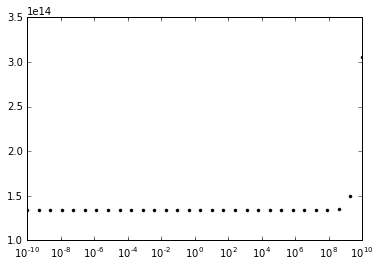

In [21]:
# Using the function to predict best model using multiple values of L1 penalty
best_l1_penalty = 0 # Initializing
lowest_RSS_l1 = 10e20 # Initializing
for L1_penalty in np.logspace(-10,10, num=30): # Range of values for which L1 penalty value changes
    error_l1 = k_fold_cross_validation_l1(10,L1_penalty,training_and_validation_data_fe,new_all_features) # Using the above 
                                                                                                #function to get the error
    if lowest_RSS_l1 > error_l1:# Checking for the lowest error
        best_l1_penalty = L1_penalty # If the condition is true then the new best_l1_penalty is from that model
        lowest_RSS_l1 = error_l1 # Also setting lowest RSS for that corresponding l1 penalty
    plt.xscale('log') # Ploting all values of l2 penalty vs errors
    plt.plot(L1_penalty,error_l1,'k.')
# Printing the error along with the L2_penalty
print "The best L1 penalty with added features is: ", best_l1_penalty
print "The lowest RSS with added features corresponding to best L1 penalty is: ", lowest_RSS_l1

# ElasticNet Regression with Added Features

The best L1 penalty with Added Features is:  1e-10
The best L2 penalty with Added Features is:  1e-10
The lowest RSS with Added Features corresponding to best L1/L2 penalty is:  1.33823131288e+14


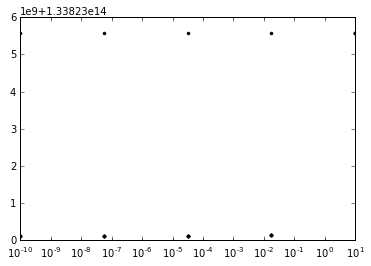

In [22]:
# Using the function to predict best model using multiple values of L1 penalty
best_l12_penalty = 0 # Initializing
lowest_RSS_l12 = 10e20 # Initializing
for L11_penalty in np.logspace(-10,1, num=5): # Range of values for which L1 penalty value changes
    for L12_penalty in np.logspace(-10,1, num=5): # Range of values for which L2 penalty value changes
        error_l12 = k_fold_cross_validation_l12(10,L12_penalty,L11_penalty,training_and_validation_data_fe,new_all_features) # Using
                                                                                    # the above function to get the error
        if lowest_RSS_l12 > error_l12: # Checking for the lowest error
            best_l12_penalty = L12_penalty# If the condition is true then the new best_l2_penalty is from that model
            best_l11_penalty = L11_penalty# If the condition is true then the new best_l1_penalty is from that model
            lowest_RSS_l12 = error_l12# Also setting lowest RSS for that corresponding l1 and l2 penalty
        # Since there are three parameters for plotting i.e. L1 Penalty, L2 Penalty, and Error therefore in order
        # to draw them we use two different plots as shown below
        plt.xscale('log')
        plt.plot(L12_penalty,error_l12,'k.') # For L2 Penalty
    plt.xscale('log')
    plt.plot(L11_penalty,error_l12,'k.') # For L1 Penalty
# Printing the error along with the L2_penalty
print "The best L1 penalty with Added Features is: ", best_l11_penalty
print "The best L2 penalty with Added Features is: ", best_l12_penalty
print "The lowest RSS with Added Features corresponding to best L1/L2 penalty is: ", lowest_RSS_l12

# Modeling added features with no regularization i.e. without any penalty

In [23]:
best_no_penalty = 0 # Setting best_no_penalty variable to be 0
lowest_RSS_no = 10e20 # Initializing
error_no = k_fold_cross_validation_no_penalty(10,0,training_and_validation_data_fe,new_all_features) # Using the above function 
                                                                                                #to get the error
lowest_RSS_no = error_no # The error of the model 
print "The value of no penalty with added features is: ", best_no_penalty
print "RSS with added features corresponding to no penalty is: ", lowest_RSS_no

The value of no penalty with added features is:  0
RSS with added features corresponding to no penalty is:  8.09288926736e+13


In [24]:
print "Best L2 Penalty with added features: ", best_l2_penalty
print "Error with added features corresponding to best L2 penalty: ", lowest_RSS_l2
print "Best L1 Penalty with added features: ", best_l1_penalty
print "Error with added features corresponding to best L1 penalty: ", lowest_RSS_l1
print "Best L1 Penalty and L2 penalty respectively with added features: ", best_l11_penalty, best_l12_penalty
print "Error with added features corresponding to best L1 and L2 penalty: ", lowest_RSS_l12
print "Value of No penaltywith added features: ", best_no_penalty
print "Error with added features corresponding to no penalty is: ", lowest_RSS_no

Best L2 Penalty with added features:  0.0188739182214
Error with added features corresponding to best L2 penalty:  8.09215852421e+13
Best L1 Penalty with added features:  1e-10
Error with added features corresponding to best L1 penalty:  1.33823131288e+14
Best L1 Penalty and L2 penalty respectively with added features:  1e-10 1e-10
Error with added features corresponding to best L1 and L2 penalty:  1.33823131288e+14
Value of No penaltywith added features:  0
Error with added features corresponding to no penalty is:  8.09288926736e+13


# Testing the Dataset with added features
### Now the next step is to test the dataset using testing data corresponding to best ridge, lasso and elasticnet
### model and check which model can most accurately predict the dataset with added features.

In [25]:
# Ridge Regression
# Here we set value of L2 penalty corresponding to best value that we calculated above
model_trained_test_l2 = graphlab.linear_regression.create(training_and_validation_data_fe, features= new_all_features,
                                             target='price', l2_penalty= best_l2_penalty,l1_penalty=0,feature_rescaling= True,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l2 = model_trained_test_l2.predict(testing_data_fe) # validating the model
RSS_trained_l2 = RSS_data(model_trained_l2, testing_data_fe['price']) # Comparing the values
print "RSS value for testing data with added features corresponding to best L2 Penalty: ", RSS_trained_l2

# Lasso Regression
# Here we set value of L1 penalty corresponding to best value that we calculated above
model_trained_test_l1 = graphlab.linear_regression.create(training_and_validation_data_fe, features= new_all_features,
                                             target='price', l2_penalty=0,l1_penalty=best_l2_penalty,max_iterations=100,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l1 = model_trained_test_l1.predict(testing_data_fe) # validating the model
RSS_trained_l1 = RSS_data(model_trained_l1, testing_data_fe['price'])  # Comparing the values
print "RSS value for testing data with added features corresponding to best L1 Penalty: ", RSS_trained_l1

# ElasticNet Regression
# Here we set value of L1 penalty corresponding to best value that we calculated above
model_trained_test_l12 = graphlab.linear_regression.create(training_and_validation_data_fe, features= new_all_features,
                                             target='price', l2_penalty=best_l12_penalty,l1_penalty=best_l11_penalty,
                                        validation_set=None,verbose=False) # Training of model
model_trained_l12 = model_trained_test_l12.predict(testing_data_fe) # validating the model
RSS_trained_l12 = RSS_data(model_trained_l12, testing_data_fe['price']) # Comparing the values
print "RSS value for testing data with added features corresponding to best L1,L2 Penalty: ", RSS_trained_l12

# No Regularization
# Here we set value of L1 and L2 penalty to be zero 
model_trained_test_no = graphlab.linear_regression.create(training_and_validation_data_fe, features= new_all_features,
                                             target='price', l2_penalty=0,l1_penalty=0,max_iterations=100,feature_rescaling= True,
                                        validation_set=None,verbose=False) # Training of model
model_trained_no = model_trained_test_no.predict(testing_data_fe) # validating the model
RSS_trained_no = RSS_data(model_trained_no, testing_data_fe['price'])  # Comparing the values
print "RSS value for testing data with added features corresponding to no Penalty: ", RSS_trained_l12

RSS value for testing data with added features corresponding to best L2 Penalty:  9.67981193121e+13
RSS value for testing data with added features corresponding to best L1 Penalty:  1.14035730071e+14
RSS value for testing data with added features corresponding to best L1,L2 Penalty:  1.55065316576e+14
RSS value for testing data with added features corresponding to no Penalty:  1.55065316576e+14
